Trying to get a better understanding of various data analysis packages in Python, I thought it would be a good idea to work through the ISLR, using Python instead of R. Many default tools in R are only available as outside packages in Python, so in many cases, it won't be as easy to do this in Python, but it shouldn't be too difficult.
We'll start with the exercises found in the applied section in chapter 3.

**8: This question involves the use of simple linear regression on the Auto data set.**

**(a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summary() function to print the results. Comment on the output. For example:**

**i. Is there a relationship between the predictor and the response?**

**ii. How strong is the relationship between the predictor and the response?**

**iii. Is the relationship between the predictor and the response positive or negative?**

**iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# there are a lot of future warnings here that we don't need to display

import warnings
warnings.filterwarnings('ignore')

# use ggplot style graphics
plt.style.use('ggplot')

# change the options so that we get the data in wide form with no wrap
pd.set_option('expand_frame_repr', False)

# read in the data, and take a look at the first few rows
auto = pd.read_csv('C:/Users/ben/Desktop/islr/auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,18,8,318,150,3436,11.0,70,1,plymouth satellite
3,16,8,304,150,3433,12.0,70,1,amc rebel sst
4,17,8,302,140,3449,10.5,70,1,ford torino


**(a) Use the lm() function to perform a simple linear regression with mpg as the response and horsepower as the predictor.  Use the summary() function to print the results.**

Before we fit a model, we should do a quick plot to see if it even makes sense to fit a linear model.

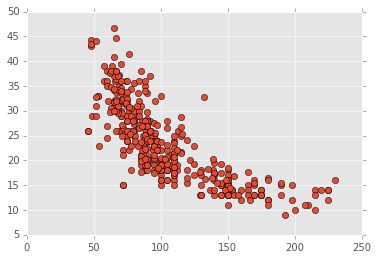

OLS Regression Results 
 
 Dep. Variable: mpg R-squared: 0.606 
 
 
 Model: OLS Adj. R-squared: 0.605 
 
 
 Method: Least Squares F-statistic: 599.7 
 
 
 Date: Sat, 16 Apr 2016 Prob (F-statistic): 7.03e-81 
 
 
 Time: 18:57:04 Log-Likelihood: -1178.7 
 
 
 No. Observations: 392 AIC: 2361. 
 
 
 Df Residuals: 390 BIC: 2369. 
 
 
 Df Model: 1 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [95.0% Conf. Int.] 
 
 
 const 39.9359 0.717 55.660 0.000 38.525 41.347 
 
 
 horsepower -0.1578 0.006 -24.489 0.000 -0.171 -0.145 
 
 
 
 
 Omnibus: 16.432 Durbin-Watson: 0.920 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 17.305 
 
 
 Skew: 0.492 Prob(JB): 0.000175 
 
 
 Kurtosis: 3.299 Cond. No. 322.

In [2]:
%matplotlib inline
plt.figure()
plt.plot(auto['horsepower'], auto['mpg'], 'o')
plt.show()

# Python doesn't have a built-in linear model function, but statsmodels will do
# There are some NAs that need to be removed.

auto_comp = auto[['horsepower', 'mpg']].dropna()
X = auto_comp['horsepower']

# To get an intercept in the model, we need to use the add_constant method

X = sm.add_constant(X)
y = auto_comp['mpg']
sm_auto_1 = sm.OLS(y, X)
results = sm_auto_1.fit()
results.summary()

**i. Is there a relationship between the predictor and the response?**

There is strong evidence to suggest there is a relationship between the predictor and reponse (the overall F stat is highly significant, as is the t stat for the horsepower coefficient.

**ii. How strong is the relationship between the predictor and the response?**

The t stat is highly significant (< .001), suggesting a strong relationship.

**iii. Is the relationship between the predictor and the response positive or negative?**

Looking at the coefficient (-0.1578), it's clearly negative.

**iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?**

For this, we need to get into code. Getting the prediction interval isn't difficult, but the confidence interval is.

In [3]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

print('Prediction: {}'.format(results.predict((1, 98))))
prdstd, int_l, int_u = wls_prediction_std(results, exog=(1, 98))
print('lower: {}, upper: {}'.format(int_l, int_u))

Prediction: [ 24.46707715]
lower: [ 14.80939607], upper: [ 34.12475823]


In [4]:
# This is a bit clumsy, but I needed to build my own function to get confidence interval for the mean.
# (if anyone has a better way of doing this, I'd love to know)

from scipy import stats

def confidence_interval_pred(model, values, point, alpha=0.05):
    pred_value = model.fit().predict((1, point))
    mse = model.fit().mse_resid
    n = len(values)
    t_stat = abs(stats.t.ppf(alpha / 2, n - 2))
    under_2 = (1 / n) + (point - values.mean()) ** 2 / sum((values - values.mean())**2)
    bound = t_stat * (mse * under_2) ** (1/2)
    return pred_value, pred_value - bound, pred_value + bound

pred, int_l, int_u = confidence_interval_pred(sm_auto_1, X['horsepower'], 98)
print('Prediction: {}'.format(pred))
print('lower: {}, upper: {}'.format(int_l, int_u))

Prediction: [ 24.46707715]
lower: [ 23.97307896], upper: [ 24.96107534]


**(b) Plot the response and the predictor. Use the abline() function to display the least squares regression line.**

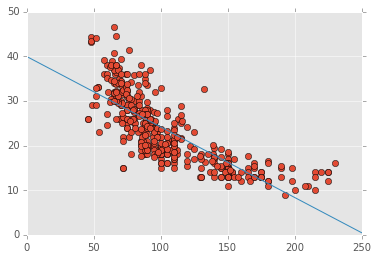

In [5]:
import numpy as np

X_plot = np.linspace(0,250,100)
plt.figure()
plt.plot(X['horsepower'], y, 'o')
plt.plot(X_plot, X_plot*results.params[1] + results.params[0]);

**(c) Use the plot() function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.**

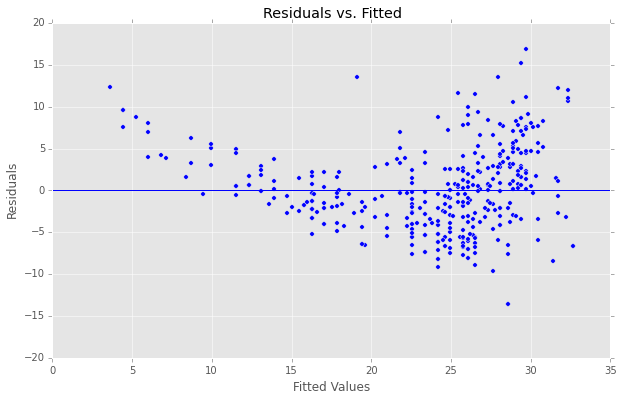

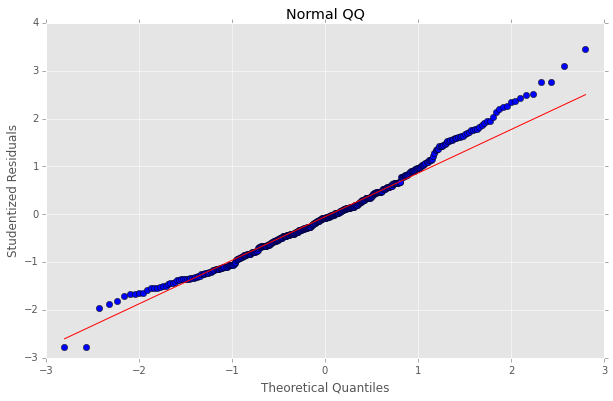

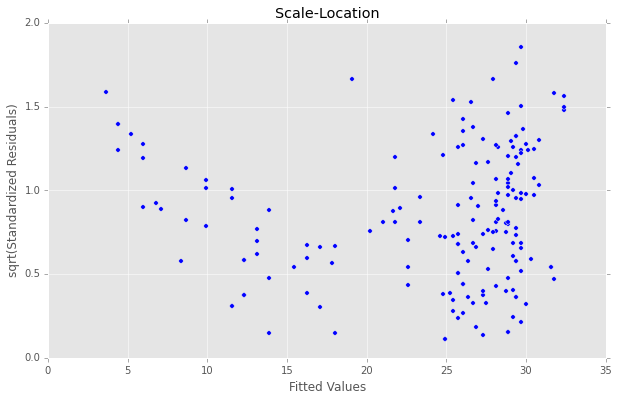

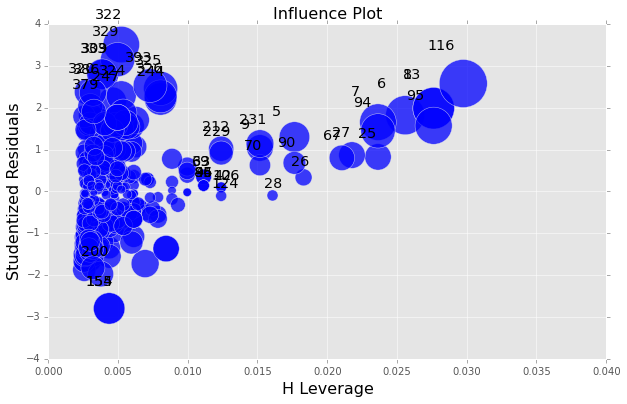

In [6]:
# There is no simple command to call all of them, so we have to do them individually.

plt.rcParams['figure.figsize'] = (10, 6)

plt.clf()
plt.scatter(x=results.fittedvalues, y=results.resid)
plt.axhline()
plt.title('Residuals vs. Fitted')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.show()

plt.clf()
sm.qqplot(results.resid / results.resid.std(), line='q')
plt.title('Normal QQ')
plt.ylabel('Studentized Residuals')
plt.xlabel('Theoretical Quantiles')
plt.show()

plt.clf()
plt.scatter(x=results.fittedvalues, y = (results.resid / results.resid.std())**(.5))
plt.title('Scale-Location')
plt.ylabel('sqrt(Standardized Residuals)')
plt.xlabel('Fitted Values')
plt.show()

plt.clf()
sm.graphics.influence_plot(results, criterion="cooks")
# the graph isn't appearing scaled correctly, so the xlimits have to be set manually
# (this value was found after calling the plot initially)
plt.xlim(0, 0.04)
plt.show()

That wasn't too bad. The plots are all there, but there isn't exactly a unified approach to them (sometimes we're building the scatter plots ourselves, other times using built-in functions. Also, matplotlib seems to have difficulty with loess lines, so more work would be required to get them to map onto the graphs.

**9: This question involves the use of multiple linear regression on the Auto data set.**

**(a) Produce a scatterplot matrix which includes all of the variables in the data set.**

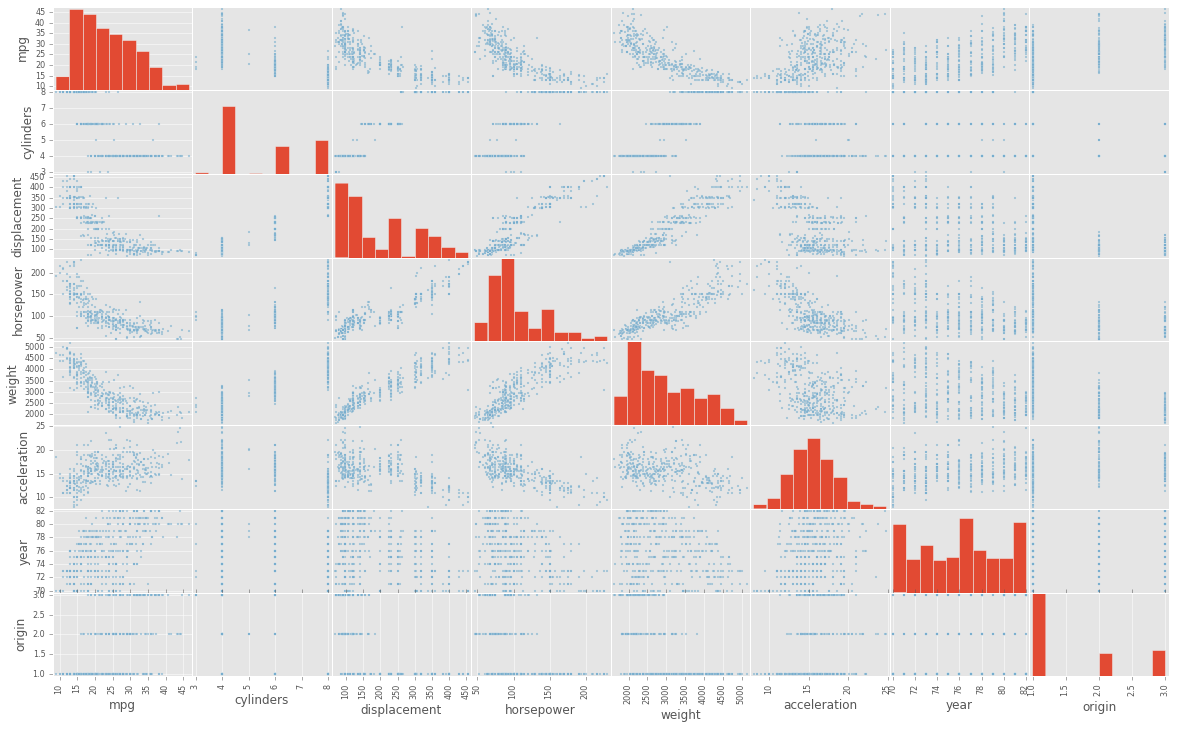

In [7]:
plt.rcParams['figure.figsize'] = (20, 12)

pd.tools.plotting.scatter_matrix(auto);

There's a lot of data here, but I think it's still mostly readable.

**(b) Compute the matrix of correlations between the variables using the function cor(). You will need to exclude the name variable, which is qualitative.**

In [8]:
auto.corr() # pandas is smart enough to remove  the qualitative variable

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


**(c) Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results.**

In [9]:
auto_red = auto.drop('name', 1).dropna()
X = auto_red.drop('mpg', 1)
y = auto_red['mpg']
X = sm.add_constant(X)
sm_auto_mul = sm.OLS(y, X)
results = sm_auto_mul.fit()
results.summary()

OLS Regression Results 
 
 Dep. Variable: mpg R-squared: 0.821 
 
 
 Model: OLS Adj. R-squared: 0.818 
 
 
 Method: Least Squares F-statistic: 252.4 
 
 
 Date: Sat, 16 Apr 2016 Prob (F-statistic): 2.04e-139 
 
 
 Time: 18:57:12 Log-Likelihood: -1023.5 
 
 
 No. Observations: 392 AIC: 2063. 
 
 
 Df Residuals: 384 BIC: 2095. 
 
 
 Df Model: 7 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [95.0% Conf. Int.] 
 
 
 const -17.2184 4.644 -3.707 0.000 -26.350 -8.087 
 
 
 cylinders -0.4934 0.323 -1.526 0.128 -1.129 0.142 
 
 
 displacement 0.0199 0.008 2.647 0.008 0.005 0.035 
 
 
 horsepower -0.0170 0.014 -1.230 0.220 -0.044 0.010 
 
 
 weight -0.0065 0.001 -9.929 0.000 -0.008 -0.005 
 
 
 acceleration 0.0806 0.099 0.815 0.415 -0.114 0.275 
 
 
 year 0.7508 0.051 14.729 0.000 0.651 0.851 
 
 
 origin 1.4261 0.278 5.127 0.000 0.879 1.973 
 
 
 
 
 Omnibus: 31.906 Durbin-Watson: 1.309 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 53.100 
 
 
 Skew: 0.529 Prob(JB): 2.95e-12 
 
 
 Kurtosis: 4.460 Cond. No. 8.59e+04

**i. Is there a relationship between the predictors and the response?**

Looking at the overall p-value (F stat for the model) we answer the hypothesis H_0: B_i = 0 for all i, and can conclude their is significant evidence to reject that hypothesis.

**ii. Which predictors appear to have a statistically significant relationship to the response?**

At the alpha = .05 level, we have that displacement, weight, year, and origin are significant.

**iii. What does the coefficient for the year variable suggest?**

The coefficient is positive, so we can state that mpg improved over time.

**(d) Use the plot() function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?**

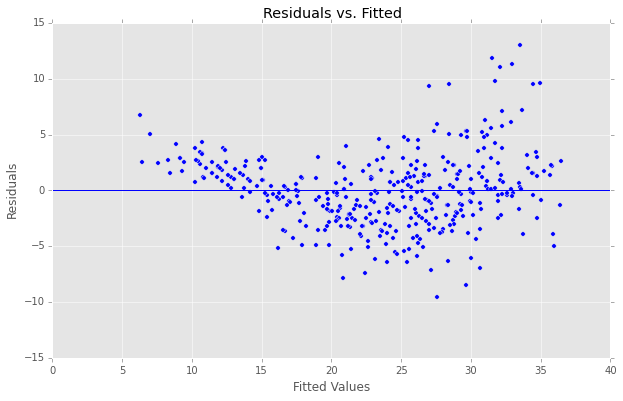

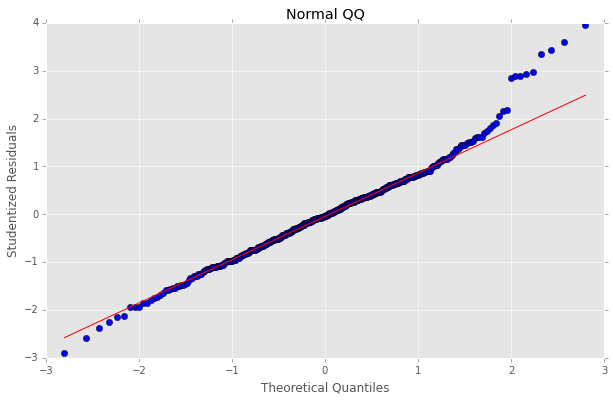

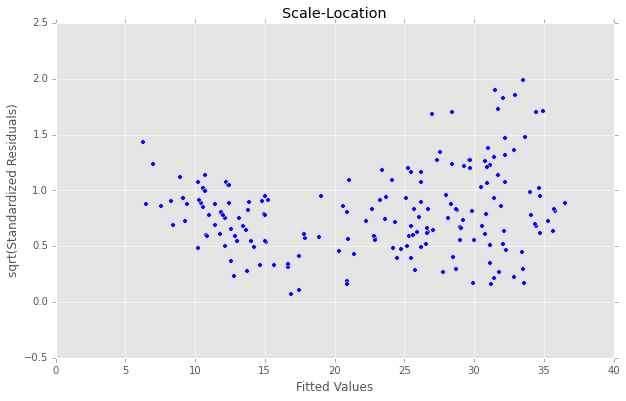

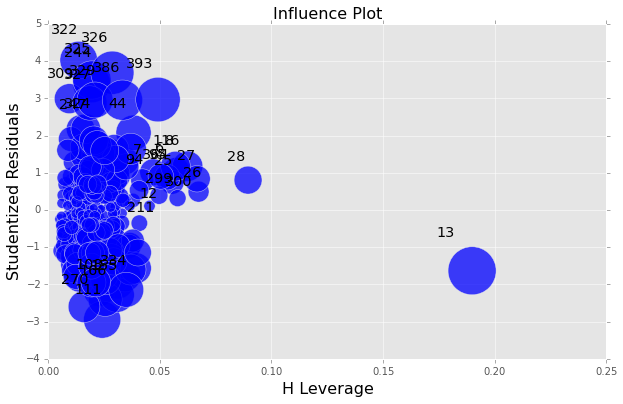

In [10]:
# we can rerun the code from the previous question to get the plots

plt.rcParams['figure.figsize'] = (10, 6)

plt.clf()
plt.scatter(x=results.fittedvalues, y=results.resid)
plt.axhline()
plt.title('Residuals vs. Fitted')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.show()

plt.clf()
sm.qqplot(results.resid / results.resid.std(), line='q')
plt.title('Normal QQ')
plt.ylabel('Studentized Residuals')
plt.xlabel('Theoretical Quantiles')
plt.show()

plt.clf()
plt.scatter(x=results.fittedvalues, y = (results.resid / results.resid.std())**(.5))
plt.title('Scale-Location')
plt.ylabel('sqrt(Standardized Residuals)')
plt.xlabel('Fitted Values')
plt.show()

plt.clf()
sm.graphics.influence_plot(results, criterion="cooks")
# the graph isn't appearing scaled correctly, so the xlimits have to be set manually
# (this value was found after calling the plot initially)
plt.xlim(0, .25)
plt.show()

There are some high leverage points, specifically observation 13 (note that pandas is 0 based indexing, whereas R is 1 based indexing).

**(e) Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?**

In the regular statsmodels.api function, we supply a design matrix and an output variable, and it fits the model for us. So if we want to include the interaction effects, we would need to build them ourselves.

As an alternative, we can use a different statsmodel api, which uses R style formulas. The colon and asterisk work the same way here as they work in R (asterisk leaves main effects in, while colon uses only the intercept. Note that origin is a categorical variable, so we need to take that into account in the model using the 'C(...)' notation.

Selecting some significant effects and testing for interactions...

In [11]:
import statsmodels.formula.api as smf

smf_auto_1 = smf.ols(formula='mpg ~ acceleration*cylinders + year:C(origin)', data = auto)
smf_results = smf_auto_1.fit()
smf_results.summary()

OLS Regression Results 
 
 Dep. Variable: mpg R-squared: 0.752 
 
 
 Model: OLS Adj. R-squared: 0.748 
 
 
 Method: Least Squares F-statistic: 196.8 
 
 
 Date: Sat, 16 Apr 2016 Prob (F-statistic): 1.16e-114 
 
 
 Time: 18:57:14 Log-Likelihood: -1103.1 
 
 
 No. Observations: 397 AIC: 2220. 
 
 
 Df Residuals: 390 BIC: 2248. 
 
 
 Df Model: 6 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [95.0% Conf. Int.] 
 
 
 Intercept -41.0671 6.683 -6.145 0.000 -54.207 -27.928 
 
 
 acceleration 1.1094 0.273 4.063 0.000 0.573 1.646 
 
 
 cylinders 0.4267 0.702 0.607 0.544 -0.954 1.808 
 
 
 acceleration:cylinders -0.1991 0.047 -4.192 0.000 -0.292 -0.106 
 
 
 year:C(origin)[1] 0.7937 0.059 13.413 0.000 0.677 0.910 
 
 
 year:C(origin)[2] 0.8244 0.061 13.626 0.000 0.705 0.943 
 
 
 year:C(origin)[3] 0.8394 0.059 14.186 0.000 0.723 0.956 
 
 
 
 
 Omnibus: 16.557 Durbin-Watson: 1.385 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 21.651 
 
 
 Skew: 0.367 Prob(JB): 1.99e-05 
 
 
 Kurtosis: 3.878 Cond. No. 3.49e+03

**(f) Try a few different transformations of the variables, such as log(X), √X, X^2. Comment on your findings.**

A quick look at the pairs plots suggest for most of the variables, a log transform will the best. However, for completeness, we'll do all the transformations suggested.

We'll restrict ourselves to the weight variable.

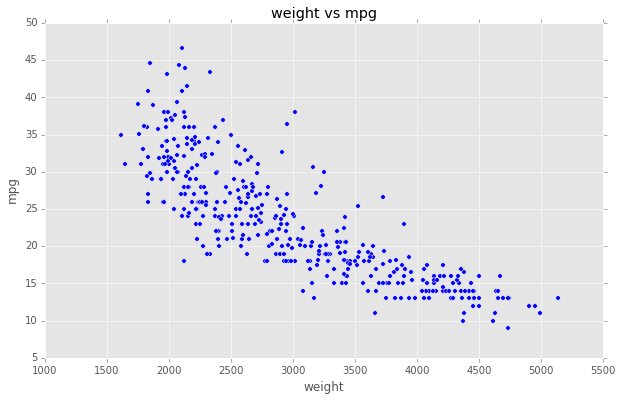

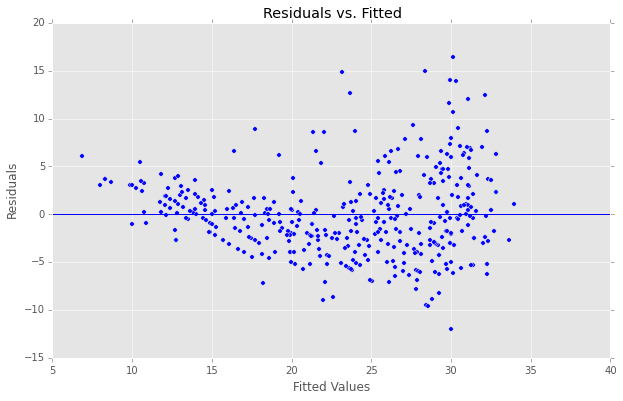

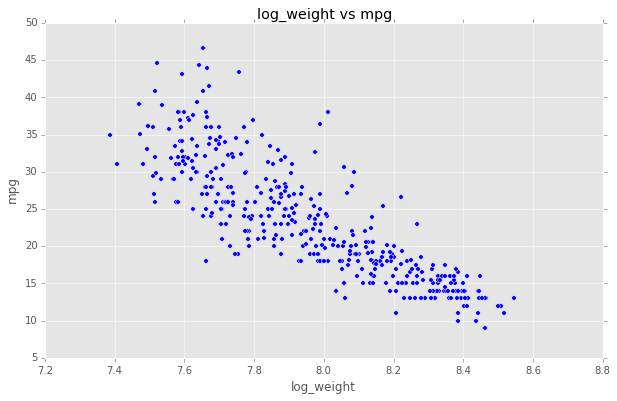

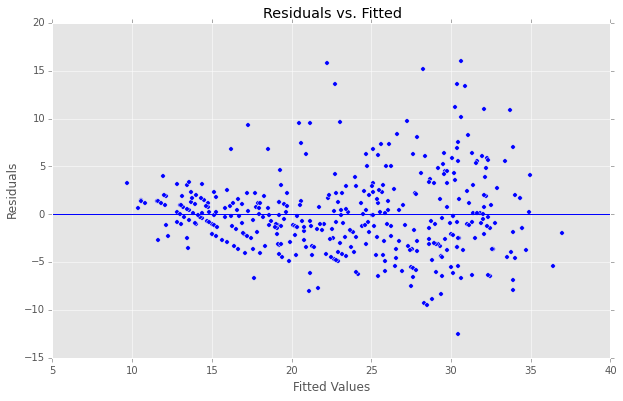

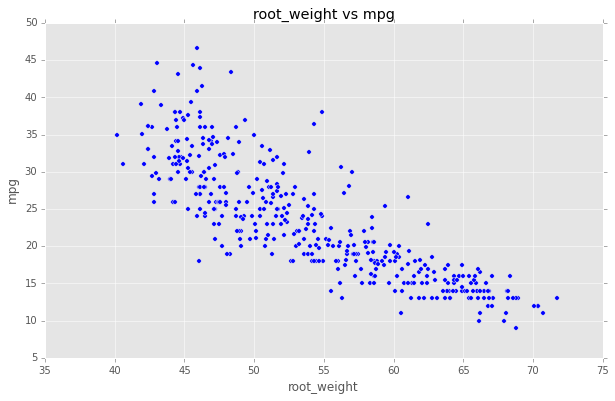

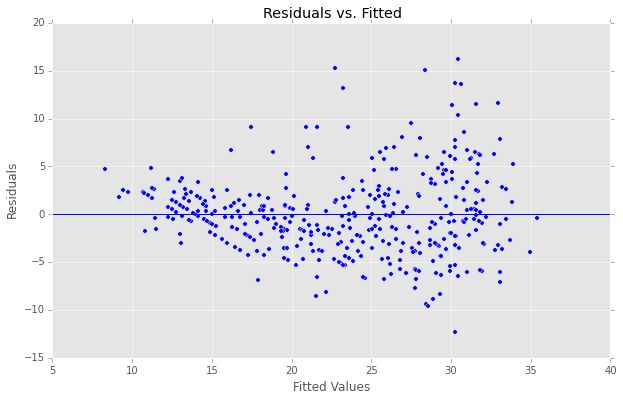

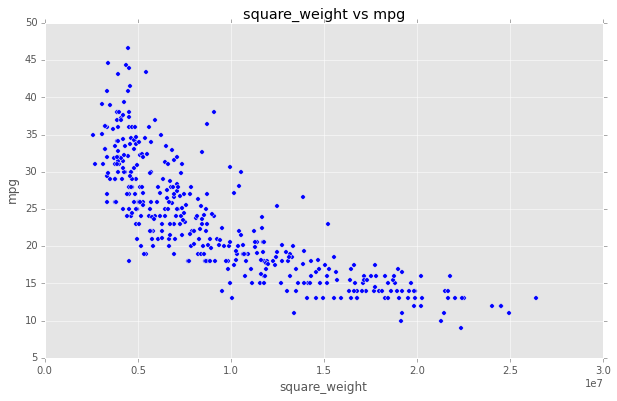

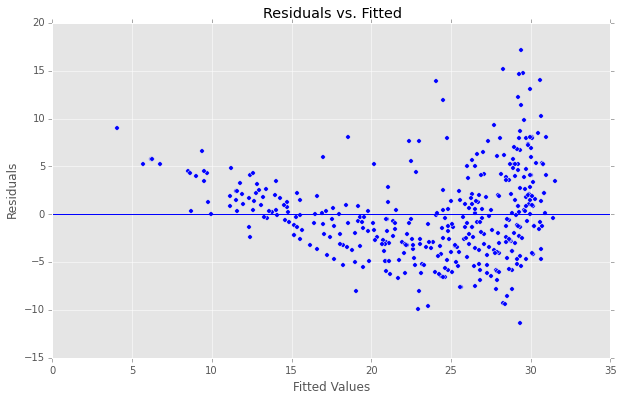

In [12]:
# in pandas, I could do something like auto['log_weight'] = np.log(auto['weight]),
# but coming from a dplyr background, I prefer the assign method grammatically 
# (although the lambda requirement is a little ugly).
# However, pandas won't do the assign inplace, unfortunately, so we have to reassign the resulting df.

auto = auto.assign(log_weight=lambda x: np.log(x.weight),
                   root_weight=lambda x: np.sqrt(x.weight),
                   square_weight=lambda x: x.weight**2)
for column in ['weight', 'log_weight', 'root_weight', 'square_weight']:
    X = auto[column]
    X = sm.add_constant(X)
    y = auto['mpg']
    sm_fit = sm.OLS(y, X)
    results = sm_fit.fit()
    plt.clf()
    plt.scatter(auto[column], y)
    plt.title(column + ' vs mpg')
    plt.ylabel('mpg')
    plt.xlabel(column)
    plt.show()
    plt.clf()
    plt.scatter(x=results.fittedvalues, y=results.resid)
    plt.axhline()
    plt.title('Residuals vs. Fitted')
    plt.ylabel('Residuals')
    plt.xlabel('Fitted Values')
    plt.show()

Both log and root do a much better job at making the relationship linear (the lines are definitely more linear, and the residuals have better behavior).

**10: This question should be answered using the Carseats data set.**

**(a) Fit a multiple regression model to predict Sales using Price, Urban, and US.**

In [13]:
carseats = pd.read_csv('C:/Users/ben/Desktop/islr/carseats.csv')
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


When we use statsmodels.OLS(y, X), X needs to be a design matrix. Since Urban and US are categorical variables, we need to do some tweaking. We have two options: use r-style formulas, or build the design matrix ourselves. There are multiple ways to build an appropriate design matrix. We'll use patsy.

In [14]:
from patsy import dmatrices

formula = 'Sales ~ Price + Urban + US'
y, X = dmatrices(formula, carseats)
carseats_lm = sm.OLS(y, X)
results = carseats_lm.fit()
results.summary()

OLS Regression Results 
 
 Dep. Variable: Sales R-squared: 0.239 
 
 
 Model: OLS Adj. R-squared: 0.234 
 
 
 Method: Least Squares F-statistic: 41.52 
 
 
 Date: Sat, 16 Apr 2016 Prob (F-statistic): 2.39e-23 
 
 
 Time: 18:57:17 Log-Likelihood: -927.66 
 
 
 No. Observations: 400 AIC: 1863. 
 
 
 Df Residuals: 396 BIC: 1879. 
 
 
 Df Model: 3 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [95.0% Conf. Int.] 
 
 
 Intercept 13.0435 0.651 20.036 0.000 11.764 14.323 
 
 
 Urban[T.Yes] -0.0219 0.272 -0.081 0.936 -0.556 0.512 
 
 
 US[T.Yes] 1.2006 0.259 4.635 0.000 0.691 1.710 
 
 
 Price -0.0545 0.005 -10.389 0.000 -0.065 -0.044 
 
 
 
 
 Omnibus: 0.676 Durbin-Watson: 1.912 
 
 
 Prob(Omnibus): 0.713 Jarque-Bera (JB): 0.758 
 
 
 Skew: 0.093 Prob(JB): 0.684 
 
 
 Kurtosis: 2.897 Cond. No. 628.

And just to verify that we get the same results from using r-style formulas with statsmodels.formula...

In [15]:
carseats_flm = smf.ols(formula='Sales ~ Price + Urban + US', data=carseats)
results = carseats_flm.fit()
results.summary()

OLS Regression Results 
 
 Dep. Variable: Sales R-squared: 0.239 
 
 
 Model: OLS Adj. R-squared: 0.234 
 
 
 Method: Least Squares F-statistic: 41.52 
 
 
 Date: Sat, 16 Apr 2016 Prob (F-statistic): 2.39e-23 
 
 
 Time: 18:57:17 Log-Likelihood: -927.66 
 
 
 No. Observations: 400 AIC: 1863. 
 
 
 Df Residuals: 396 BIC: 1879. 
 
 
 Df Model: 3 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [95.0% Conf. Int.] 
 
 
 Intercept 13.0435 0.651 20.036 0.000 11.764 14.323 
 
 
 Urban[T.Yes] -0.0219 0.272 -0.081 0.936 -0.556 0.512 
 
 
 US[T.Yes] 1.2006 0.259 4.635 0.000 0.691 1.710 
 
 
 Price -0.0545 0.005 -10.389 0.000 -0.065 -0.044 
 
 
 
 
 Omnibus: 0.676 Durbin-Watson: 1.912 
 
 
 Prob(Omnibus): 0.713 Jarque-Bera (JB): 0.758 
 
 
 Skew: 0.093 Prob(JB): 0.684 
 
 
 Kurtosis: 2.897 Cond. No. 628.

In this example, using patsy was probably just as easy as just building the appropriate variables and using them in the regression, but patsy can build a full model (using interactions, etc). It was also easier to just use r-style formulas.

**(b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!**

Holding other variables constant, sales in an urban setting decrease by about 20 units.
Holding other variables constant, sales in the US increased about about 1,200 units.
Holding other variables constant, a one dollar increase in price is associated with a decrease of about 50 units.

**(c) Write out the model in equation form, being careful to handle the qualitative variables properly.**

Sales(thousands) = 13.0435 - 0.0219(Urban = Yes) + 1.2006(US = Yes) - 0.0545XPrice

**(d) For which of the predictors can you reject the null hypothesis H0 : βj = 0?**

We can reject the null hypothesis for US and Price.

**(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.**

In [16]:
carseats_flm = smf.ols(formula='Sales ~ Price + US', data=carseats)
results = carseats_flm.fit()
results.summary()

OLS Regression Results 
 
 Dep. Variable: Sales R-squared: 0.239 
 
 
 Model: OLS Adj. R-squared: 0.235 
 
 
 Method: Least Squares F-statistic: 62.43 
 
 
 Date: Sat, 16 Apr 2016 Prob (F-statistic): 2.66e-24 
 
 
 Time: 18:57:17 Log-Likelihood: -927.66 
 
 
 No. Observations: 400 AIC: 1861. 
 
 
 Df Residuals: 397 BIC: 1873. 
 
 
 Df Model: 2 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [95.0% Conf. Int.] 
 
 
 Intercept 13.0308 0.631 20.652 0.000 11.790 14.271 
 
 
 US[T.Yes] 1.1996 0.258 4.641 0.000 0.692 1.708 
 
 
 Price -0.0545 0.005 -10.416 0.000 -0.065 -0.044 
 
 
 
 
 Omnibus: 0.666 Durbin-Watson: 1.912 
 
 
 Prob(Omnibus): 0.717 Jarque-Bera (JB): 0.749 
 
 
 Skew: 0.092 Prob(JB): 0.688 
 
 
 Kurtosis: 2.895 Cond. No. 607.

**(f) How well do the models in (a) and (e) fit the data?**

(a) has an adjusted R^2 of 0.234, while (e) has an adjusted R^2 of 0.235.

A test of (Is the reduced model adequate?) is answered in this case by noting that the removed term is non-significant.

However, neither model has a particularly high R^2, suggesting neither fit the data extremely well.

**(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).**

The confidence intervals for the estimates are included in the output.

**(h) Is there evidence of outliers or high leverage observations in the model from (e)?**

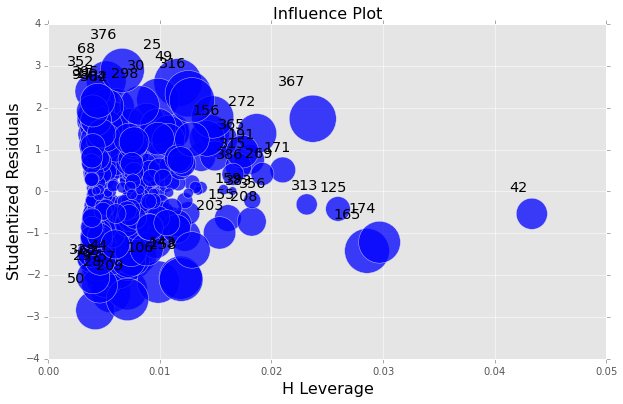

In [17]:
plt.clf()
sm.graphics.influence_plot(results, criterion="cooks")
# the graph isn't appearing scaled correctly, so the xlimits have to be set manually
# (this value was found after calling the plot initially)
plt.xlim(0, .05)
plt.show()

Looking at the plot, we can see several observations that have large residuals (>2) and some points that have higher leverage.

**11: In this problem we will investigate the t-statistic for the null hypothesis H0 : β = 0 in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows.**
```
set.seed (1)
x=rnorm (100)
y=2*x+rnorm (100)
```
**(a) Perform a simple linear regression of y onto x, without an intercept. Report the coefficient estimate B, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : β = 0. Comment on these results. (You can perform regression without an intercept using the command lm(y∼x+0).)**

In [18]:
np.random.seed(1)
x = np.random.normal(size=100)
y = 2 * x + np.random.normal(size=100)

simple = sm.OLS(y, x)
results = simple.fit()
results.summary()

OLS Regression Results 
 
 Dep. Variable: y R-squared: 0.798 
 
 
 Model: OLS Adj. R-squared: 0.796 
 
 
 Method: Least Squares F-statistic: 391.7 
 
 
 Date: Sat, 16 Apr 2016 Prob (F-statistic): 3.46e-36 
 
 
 Time: 18:57:18 Log-Likelihood: -135.67 
 
 
 No. Observations: 100 AIC: 273.3 
 
 
 Df Residuals: 99 BIC: 275.9 
 
 
 Df Model: 1 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [95.0% Conf. Int.] 
 
 
 x1 2.1067 0.106 19.792 0.000 1.896 2.318 
 
 
 
 
 Omnibus: 0.880 Durbin-Watson: 2.106 
 
 
 Prob(Omnibus): 0.644 Jarque-Bera (JB): 0.554 
 
 
 Skew: -0.172 Prob(JB): 0.758 
 
 
 Kurtosis: 3.119 Cond. No. 1.00

About what we'd expect. The coefficient is close to 2, as it should be, and is highly significant (< .001), as is the overall model.

**(b) Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis H0 : β = 0. Comment on these results.**

In [19]:
simple = sm.OLS(x, y)
results = simple.fit()
results.summary()

OLS Regression Results 
 
 Dep. Variable: y R-squared: 0.798 
 
 
 Model: OLS Adj. R-squared: 0.796 
 
 
 Method: Least Squares F-statistic: 391.7 
 
 
 Date: Sat, 16 Apr 2016 Prob (F-statistic): 3.46e-36 
 
 
 Time: 18:57:18 Log-Likelihood: -49.891 
 
 
 No. Observations: 100 AIC: 101.8 
 
 
 Df Residuals: 99 BIC: 104.4 
 
 
 Df Model: 1 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [95.0% Conf. Int.] 
 
 
 x1 0.3789 0.019 19.792 0.000 0.341 0.417 
 
 
 
 
 Omnibus: 0.476 Durbin-Watson: 2.166 
 
 
 Prob(Omnibus): 0.788 Jarque-Bera (JB): 0.631 
 
 
 Skew: 0.115 Prob(JB): 0.729 
 
 
 Kurtosis: 2.685 Cond. No. 1.00

The p-value is identical (it displays as 0 in both of them, but when more precision is available, we can see they're the same)... which leads to the next question...

**(c) What is the relationship between the results obtained in (a) and (b)?**

(see above)

The next couple of questions are theory/math derivations, so they won't be done here.

**(f) In R, show that when regression is performed with an intercept, the t-statistic for H0 : β1 = 0 is the same for the regression of y onto x as it is for the regression of x onto y.**

In [20]:
np.random.seed(1)
x = np.random.normal(size=100)
y = 2 * x + np.random.normal(size=100)

x_int = sm.add_constant(x)
y_int = sm.add_constant(y)

simple = sm.OLS(y, x_int)
results = simple.fit()
results.summary()

OLS Regression Results 
 
 Dep. Variable: y R-squared: 0.800 
 
 
 Model: OLS Adj. R-squared: 0.798 
 
 
 Method: Least Squares F-statistic: 391.4 
 
 
 Date: Sat, 16 Apr 2016 Prob (F-statistic): 5.39e-36 
 
 
 Time: 18:57:18 Log-Likelihood: -134.44 
 
 
 No. Observations: 100 AIC: 272.9 
 
 
 Df Residuals: 98 BIC: 278.1 
 
 
 Df Model: 1 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [95.0% Conf. Int.] 
 
 
 const 0.1470 0.094 1.564 0.121 -0.039 0.334 
 
 
 x1 2.0954 0.106 19.783 0.000 1.885 2.306 
 
 
 
 
 Omnibus: 0.898 Durbin-Watson: 2.157 
 
 
 Prob(Omnibus): 0.638 Jarque-Bera (JB): 0.561 
 
 
 Skew: -0.172 Prob(JB): 0.755 
 
 
 Kurtosis: 3.127 Cond. No. 1.15

In [21]:
simple = sm.OLS(x, y_int)
results = simple.fit()
results.summary()

OLS Regression Results 
 
 Dep. Variable: y R-squared: 0.800 
 
 
 Model: OLS Adj. R-squared: 0.798 
 
 
 Method: Least Squares F-statistic: 391.4 
 
 
 Date: Sat, 16 Apr 2016 Prob (F-statistic): 5.39e-36 
 
 
 Time: 18:57:18 Log-Likelihood: -49.289 
 
 
 No. Observations: 100 AIC: 102.6 
 
 
 Df Residuals: 98 BIC: 107.8 
 
 
 Df Model: 1 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [95.0% Conf. Int.] 
 
 
 const -0.0440 0.040 -1.090 0.279 -0.124 0.036 
 
 
 x1 0.3817 0.019 19.783 0.000 0.343 0.420 
 
 
 
 
 Omnibus: 0.456 Durbin-Watson: 2.192 
 
 
 Prob(Omnibus): 0.796 Jarque-Bera (JB): 0.611 
 
 
 Skew: 0.118 Prob(JB): 0.737 
 
 
 Kurtosis: 2.698 Cond. No. 2.12

As we can see the t stat is the same for both (19.783).

**12. This problem involves simple linear regression without an intercept. (a) Recall that the coefficient estimate ˆ β for the linear regression of Y onto X without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?**

Looking at 3.8, we can see the coefficient will be the same when Sum(x_i^2) = Sum(y_i^2).

**(b) Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.**

This one is easy. We just need a case where the sums don't agree.

In [22]:
x = np.random.normal(size=100, loc=10)
y = .5*x

print(sum(x**2))
print(sum(y**2))

simple = sm.OLS(x, y)
results = simple.fit()
results.summary()

10120.6431761
2530.16079401


OLS Regression Results 
 
 Dep. Variable: y R-squared: 1.000 
 
 
 Model: OLS Adj. R-squared: 1.000 
 
 
 Method: Least Squares F-statistic: 7.973e+32 
 
 
 Date: Sat, 16 Apr 2016 Prob (F-statistic): 0.00 
 
 
 Time: 18:57:18 Log-Likelihood: 3185.4 
 
 
 No. Observations: 100 AIC: -6369. 
 
 
 Df Residuals: 99 BIC: -6366. 
 
 
 Df Model: 1 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [95.0% Conf. Int.] 
 
 
 x1 2.0000 7.08e-17 2.82e+16 0.000 2.000 2.000 
 
 
 
 
 Omnibus: 216.002 Durbin-Watson: 0.001 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 39228.999 
 
 
 Skew: -9.849 Prob(JB): 0.00 
 
 
 Kurtosis: 98.010 Cond. No. 1.00

In [23]:
simple = sm.OLS(y, x)
results = simple.fit()
results.summary()

OLS Regression Results 
 
 Dep. Variable: y R-squared: 1.000 
 
 
 Model: OLS Adj. R-squared: 1.000 
 
 
 Method: Least Squares F-statistic: 7.973e+32 
 
 
 Date: Sat, 16 Apr 2016 Prob (F-statistic): 0.00 
 
 
 Time: 18:57:18 Log-Likelihood: 3254.7 
 
 
 No. Observations: 100 AIC: -6507. 
 
 
 Df Residuals: 99 BIC: -6505. 
 
 
 Df Model: 1 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [95.0% Conf. Int.] 
 
 
 x1 0.5000 1.77e-17 2.82e+16 0.000 0.500 0.500 
 
 
 
 
 Omnibus: 216.002 Durbin-Watson: 0.001 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 39228.999 
 
 
 Skew: -9.849 Prob(JB): 0.00 
 
 
 Kurtosis: 98.010 Cond. No. 1.00

**(c) Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.**

This one requires more work. We need to force a case where the sums do agree. The easiest way to do this is to fix all but one y value and solve for the remaining term that makes them agree.

In [24]:
x = np.random.normal(size=100, loc=10)
y = .5*x[:-1]
y = np.append(y, np.sqrt(sum(x**2) - sum(y**2)))

print(sum(x**2))
print(sum(y**2))

simple = sm.OLS(x, y)
results = simple.fit()
results.summary()

10072.6136714
10072.6136714


OLS Regression Results 
 
 Dep. Variable: y R-squared: 0.357 
 
 
 Model: OLS Adj. R-squared: 0.350 
 
 
 Method: Least Squares F-statistic: 54.96 
 
 
 Date: Sat, 16 Apr 2016 Prob (F-statistic): 4.23e-11 
 
 
 Time: 18:57:18 Log-Likelihood: -350.44 
 
 
 No. Observations: 100 AIC: 702.9 
 
 
 Df Residuals: 99 BIC: 705.5 
 
 
 Df Model: 1 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [95.0% Conf. Int.] 
 
 
 x1 0.5975 0.081 7.414 0.000 0.438 0.757 
 
 
 
 
 Omnibus: 211.745 Durbin-Watson: 0.357 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 35535.494 
 
 
 Skew: -9.491 Prob(JB): 0.00 
 
 
 Kurtosis: 93.378 Cond. No. 1.00

In [25]:
simple = sm.OLS(y, x)
results = simple.fit()
results.summary()

OLS Regression Results 
 
 Dep. Variable: y R-squared: 0.357 
 
 
 Model: OLS Adj. R-squared: 0.350 
 
 
 Method: Least Squares F-statistic: 54.96 
 
 
 Date: Sat, 16 Apr 2016 Prob (F-statistic): 4.23e-11 
 
 
 Time: 18:57:18 Log-Likelihood: -350.44 
 
 
 No. Observations: 100 AIC: 702.9 
 
 
 Df Residuals: 99 BIC: 705.5 
 
 
 Df Model: 1 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [95.0% Conf. Int.] 
 
 
 x1 0.5975 0.081 7.414 0.000 0.438 0.757 
 
 
 
 
 Omnibus: 215.974 Durbin-Watson: 1.010 
 
 
 Prob(Omnibus): 0.000 Jarque-Bera (JB): 39203.463 
 
 
 Skew: 9.847 Prob(JB): 0.00 
 
 
 Kurtosis: 97.979 Cond. No. 1.00

**13: In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use set.seed(1) prior to starting part (a) to ensure consistent results.**

**(a) Using the rnorm() function, create a vector, x, containing 100 observations drawn from a N(0, 1) distribution. This represents a feature, X.**

In [26]:
np.random.seed(42)
x = np.random.normal(size=100)

**(b) Using the rnorm() function, create a vector, eps, containing 100 observations drawn from a N(0, 0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.**


In [27]:
eps = np.random.normal(loc=0, scale=0.25, size=100)

**(c) Using x and eps, generate a vector y according to the model**
$$Y = −1 + 0.5X + \epsilon$$
**What is the length of the vector y? What are the values of β0 and β1 in this linear model?**

In [28]:
y = -1 + 0.5*x + eps

len(y)

100

The length of y is 100; β0 = -1, and β1 = 0.5.

**(d) Create a scatterplot displaying the relationship between x and y. Comment on what you observe.**

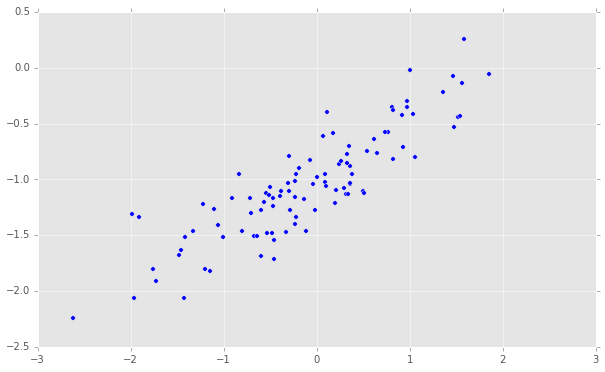

In [29]:
plt.scatter(x, y);

Linear with a positive slope, and a bit of variance.


**(e) Fit a least squares linear model to predict y using x. Comment on the model obtained. How do B0 and B1 compare to β0 and β1?**

In [30]:
x = sm.add_constant(x)
simple = sm.OLS(y, x)
results = simple.fit()
results.summary()

OLS Regression Results 
 
 Dep. Variable: y R-squared: 0.761 
 
 
 Model: OLS Adj. R-squared: 0.759 
 
 
 Method: Least Squares F-statistic: 312.2 
 
 
 Date: Sat, 16 Apr 2016 Prob (F-statistic): 3.14e-32 
 
 
 Time: 18:57:18 Log-Likelihood: 2.9213 
 
 
 No. Observations: 100 AIC: -1.843 
 
 
 Df Residuals: 98 BIC: 3.368 
 
 
 Df Model: 1 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [95.0% Conf. Int.] 
 
 
 const -0.9981 0.024 -41.772 0.000 -1.046 -0.951 
 
 
 x1 0.4642 0.026 17.669 0.000 0.412 0.516 
 
 
 
 
 Omnibus: 1.950 Durbin-Watson: 2.194 
 
 
 Prob(Omnibus): 0.377 Jarque-Bera (JB): 1.909 
 
 
 Skew: 0.327 Prob(JB): 0.385 
 
 
 Kurtosis: 2.829 Cond. No. 1.16

**(f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the legend() command to create an appropriate legend.**

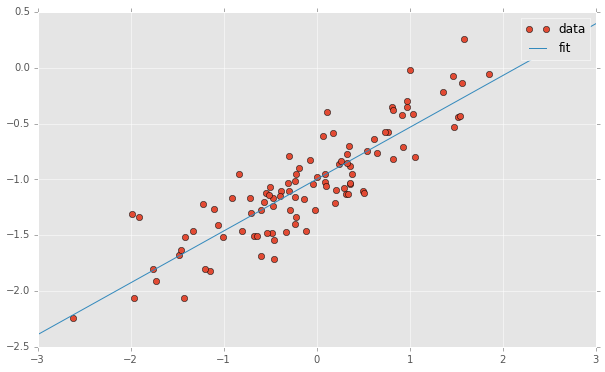

In [31]:
X_plot = np.linspace(-3, 3,100)
plt.clf()
scat, = plt.plot(x[:, 1], y, 'o')
line, = plt.plot(X_plot, X_plot*results.params[1] + results.params[0])
plt.legend((scat, line), 
           ('data', 'fit'),
          fontsize=12);

**(g) Now fit a polynomial regression model that predicts y using x and x2. Is there evidence that the quadratic term improves the model fit? Explain your answer.**

In [32]:
x_2 = np.column_stack((x, x[:, 1]**2))
simple_2 = sm.OLS(y, x_2)
results_2 = simple_2.fit()
results_2.summary()

OLS Regression Results 
 
 Dep. Variable: y R-squared: 0.772 
 
 
 Model: OLS Adj. R-squared: 0.768 
 
 
 Method: Least Squares F-statistic: 164.4 
 
 
 Date: Sat, 16 Apr 2016 Prob (F-statistic): 6.92e-32 
 
 
 Time: 18:57:19 Log-Likelihood: 5.3048 
 
 
 No. Observations: 100 AIC: -4.610 
 
 
 Df Residuals: 97 BIC: 3.206 
 
 
 Df Model: 2 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [95.0% Conf. Int.] 
 
 
 const -1.0345 0.029 -35.917 0.000 -1.092 -0.977 
 
 
 x1 0.4811 0.027 17.867 0.000 0.428 0.535 
 
 
 x2 0.0461 0.021 2.176 0.032 0.004 0.088 
 
 
 
 
 Omnibus: 2.075 Durbin-Watson: 2.233 
 
 
 Prob(Omnibus): 0.354 Jarque-Bera (JB): 1.910 
 
 
 Skew: 0.239 Prob(JB): 0.385 
 
 
 Kurtosis: 2.521 Cond. No. 2.27

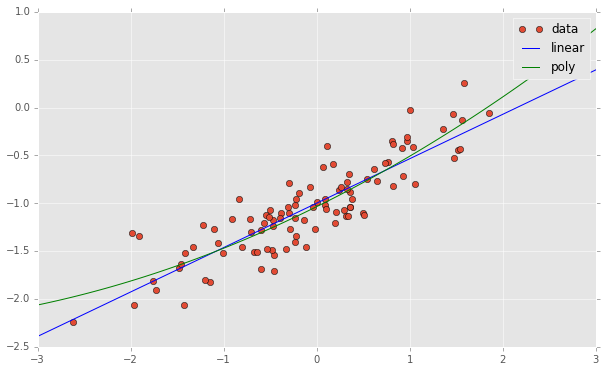

In [33]:
X_plot = np.linspace(-3, 3,100)
plt.clf()
scat, = plt.plot(x[:, 1], y, 'o')
line, = plt.plot(X_plot, X_plot*results.params[1] + results.params[0], 'b')
poly, = plt.plot(X_plot, X_plot*results_2.params[1] + results_2.params[0] + X_plot**2*results_2.params[2], 'g')
plt.legend((scat, line, poly), 
           ('data', 'linear', 'poly'),
          fontsize=12);

Yes. The t stat for the extra term has moderate moderate to strong evidence for significant. They both appear to fit the data relatively well. Both models are significant. It might be helpful to look at the residual plots.

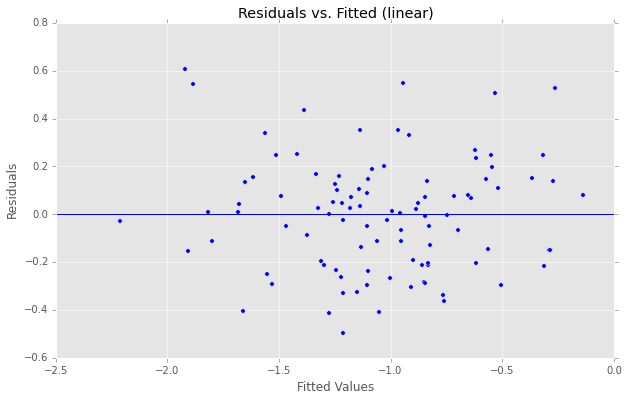

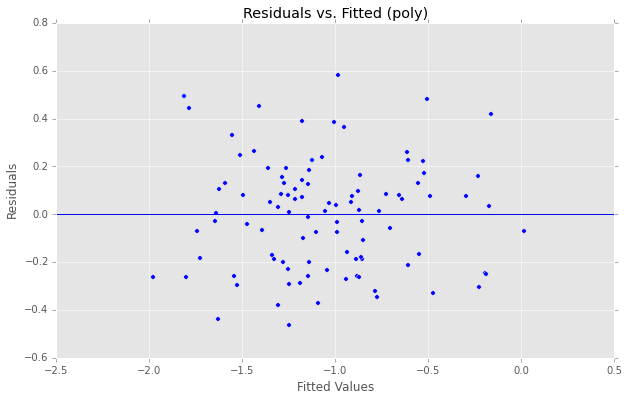

In [34]:
plt.clf()
plt.scatter(x=results.fittedvalues, y=results.resid)
plt.axhline()
plt.title('Residuals vs. Fitted (linear)')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.show()

plt.clf()
plt.scatter(x=results_2.fittedvalues, y=results_2.resid)
plt.axhline()
plt.title('Residuals vs. Fitted (poly)')
plt.ylabel('Residuals')
plt.xlabel('Fitted Values')
plt.show()

Linear looks a little better (residuals spread out more).

We could do a more formal f test to compare the full and reduced model, but since we only have one extra parameter, it's the same as the test for **β2** = 0, and p = .032, so again, strong to moderate evidence that the full model fits better.

**(h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term ε in (b). Describe your results.**

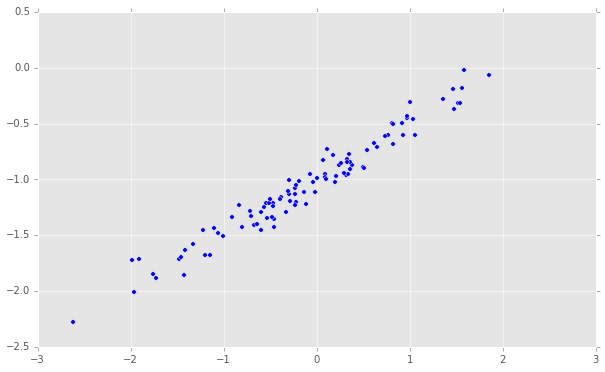

In [35]:
np.random.seed(42)
x_less = np.random.normal(size=100)

eps_less = np.random.normal(loc=0, scale=0.1, size=100)

y_less = -1 + 0.5*x_less + eps_less

plt.scatter(x_less, y_less);

In [36]:
x_less = sm.add_constant(x_less)
simple_less = sm.OLS(y_less, x_less)
results_less = simple_less.fit()
results_less.summary()

OLS Regression Results 
 
 Dep. Variable: y R-squared: 0.956 
 
 
 Model: OLS Adj. R-squared: 0.956 
 
 
 Method: Least Squares F-statistic: 2136. 
 
 
 Date: Sat, 16 Apr 2016 Prob (F-statistic): 2.39e-68 
 
 
 Time: 18:57:20 Log-Likelihood: 94.550 
 
 
 No. Observations: 100 AIC: -185.1 
 
 
 Df Residuals: 98 BIC: -179.9 
 
 
 Df Model: 1 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [95.0% Conf. Int.] 
 
 
 const -0.9993 0.010 -104.545 0.000 -1.018 -0.980 
 
 
 x1 0.4857 0.011 46.217 0.000 0.465 0.507 
 
 
 
 
 Omnibus: 1.950 Durbin-Watson: 2.194 
 
 
 Prob(Omnibus): 0.377 Jarque-Bera (JB): 1.909 
 
 
 Skew: 0.327 Prob(JB): 0.385 
 
 
 Kurtosis: 2.829 Cond. No. 1.16

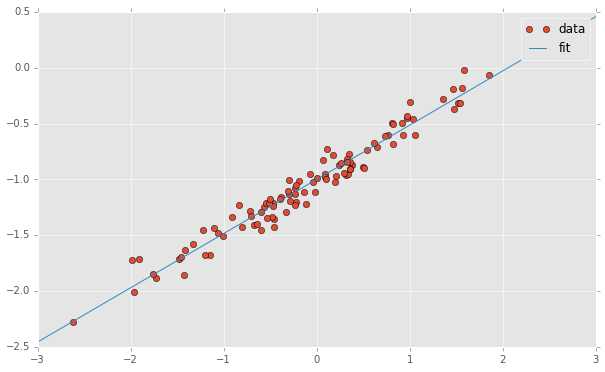

In [37]:
X_plot = np.linspace(-3, 3,100)
plt.clf()
scat, = plt.plot(x_less[:, 1], y_less, 'o')
line, = plt.plot(X_plot, X_plot*results_less.params[1] + results_less.params[0])
plt.legend((scat, line),
           ('data', 'fit'),
          fontsize=12);

As expected, the model is a much tighter fit. The standard error the coefficient is smaller, and the p value for the model is much lower.

**(i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model (3.39) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term ε in (b). Describe your results.**

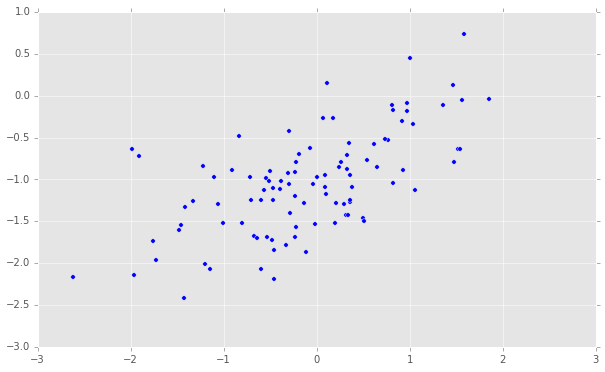

In [38]:
np.random.seed(42)
x_more = np.random.normal(size=100)

eps_more = np.random.normal(loc=0, scale=0.5, size=100)

y_more = -1 + 0.5*x_more + eps_more

plt.scatter(x_more, y_more);

In [39]:
x_more = sm.add_constant(x_more)
simple_more = sm.OLS(y_more, x_more)
results_more = simple_more.fit()
results_more.summary()

OLS Regression Results 
 
 Dep. Variable: y R-squared: 0.404 
 
 
 Model: OLS Adj. R-squared: 0.398 
 
 
 Method: Least Squares F-statistic: 66.47 
 
 
 Date: Sat, 16 Apr 2016 Prob (F-statistic): 1.20e-12 
 
 
 Time: 18:57:20 Log-Likelihood: -66.393 
 
 
 No. Observations: 100 AIC: 136.8 
 
 
 Df Residuals: 98 BIC: 142.0 
 
 
 Df Model: 1 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [95.0% Conf. Int.] 
 
 
 const -0.9963 0.048 -20.847 0.000 -1.091 -0.901 
 
 
 x1 0.4284 0.053 8.153 0.000 0.324 0.533 
 
 
 
 
 Omnibus: 1.950 Durbin-Watson: 2.194 
 
 
 Prob(Omnibus): 0.377 Jarque-Bera (JB): 1.909 
 
 
 Skew: 0.327 Prob(JB): 0.385 
 
 
 Kurtosis: 2.829 Cond. No. 1.16

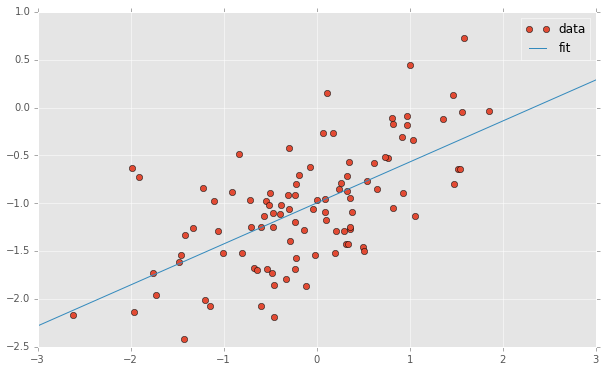

In [40]:
X_plot = np.linspace(-3, 3,100)
plt.clf()
scat, = plt.plot(x_more[:, 1], y_more, 'o')
line, = plt.plot(X_plot, X_plot*results_more.params[1] + results_more.params[0])
plt.legend((scat, line),
           ('data', 'fit'),
          fontsize=12);

About what we'd expect. The model is still significant (n = 100 is a pretty good sample size for determining significance/effect for this much noise), but the error term for the estimate of β1 is definitely higher.

**(j) What are the confidence intervals for β0 and β1 based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.**

In [41]:
def display_confidence_intervals(results):
    print('β0')
    print('lower: {},\testimate: {}, \tupper: {}'.format(results.conf_int()[0][0], 
                                                           results.params[0], 
                                                           results.conf_int()[0][1]))
    print('Width: {}'.format(results.conf_int()[0][1] - results.conf_int()[0][0]))
    print('β1')
    print('lower: {},\testimate: {}, \tupper: {}'.format(results.conf_int()[1][0], 
                                                           results.params[1], 
                                                           results.conf_int()[1][1]))
    print('Width: {}'.format(results.conf_int()[1][1] - results.conf_int()[1][0]))
print('Less...')
display_confidence_intervals(results_less)
print('\'Normal\'')
display_confidence_intervals(results)
print('More')
display_confidence_intervals(results_more)

Less...
β0
lower: -1.0182249726555679,	estimate: -0.9992572170136036, 	upper: -0.9802894613716393
Width: 0.03793551128392858
β1
lower: 0.4648206002794938,	estimate: 0.4856742839728554, 	upper: 0.506527967666217
Width: 0.041707367386723204
'Normal'
β0
lower: -1.0455624316389194,	estimate: -0.9981430425340085, 	upper: -0.9507236534290977
Width: 0.09483877820982167
β1
lower: 0.4120515006987349,	estimate: 0.46418570993213887, 	upper: 0.5163199191655429
Width: 0.10426841846680796
More
β0
lower: -1.091124863277838,	estimate: -0.9962860850680164, 	upper: -0.9014473068581947
Width: 0.18967755641964335
β1
lower: 0.3241030013974701,	estimate: 0.428371419864278, 	upper: 0.532639838331086
Width: 0.20853683693361585


Lower variance leads to tighter intervals, higher variance leads to wider intervals.

**14: This problem focuses on the collinearity problem.**
**(a) Perform the following commands in R:**
```
set.seed (1)
x1=runif (100)
x2 =0.5* x1+rnorm (100) /10
y=2+2* x1 +0.3* x2+rnorm (100)
```
**The last line corresponds to creating a linear model in which y is a function of x1 and x2. Write out the form of the linear model. What are the regression coefficients?**

β0 = 2, β1 = 2, and β2 = 3

**(b) What is the correlation between x1 and x2? Create a scatterplot displaying the relationship between the variables.**

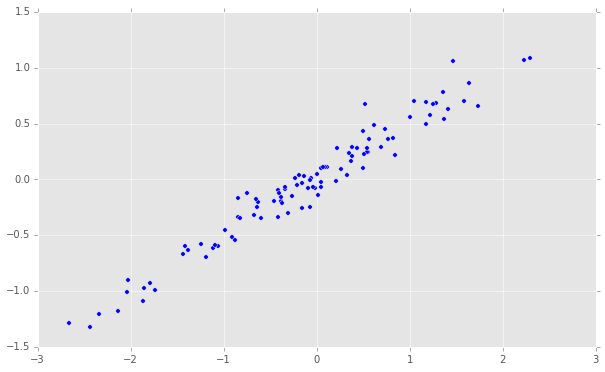

In [42]:
np.random.seed(2)
x_1 = np.random.normal(size=100)
x_2 = 0.5*x_1 + np.random.normal(size=100)/10
y = 2 + 2*x_1 + 0.3*x_2 + np.random.normal(size=100)
plt.clf()
plt.scatter(x_1, x_2);

**(c) Using this data, fit a least squares regression to predict y using x1 and x2. Describe the results obtained. What are B0, B1, and B2? How do these relate to the true β0, β1, and β2? Can you reject the null hypothesis H0 : β1 = 0? How about the null hypothesis H0 : β2 = 0?**

In [43]:
X = np.column_stack((x_1, x_2))
X = sm.add_constant(X)
corr_model = sm.OLS(y, X)
results = corr_model.fit()
results.summary()

OLS Regression Results 
 
 Dep. Variable: y R-squared: 0.832 
 
 
 Model: OLS Adj. R-squared: 0.828 
 
 
 Method: Least Squares F-statistic: 239.3 
 
 
 Date: Sat, 16 Apr 2016 Prob (F-statistic): 3.09e-38 
 
 
 Time: 18:57:21 Log-Likelihood: -137.22 
 
 
 No. Observations: 100 AIC: 280.4 
 
 
 Df Residuals: 97 BIC: 288.3 
 
 
 Df Model: 2 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [95.0% Conf. Int.] 
 
 
 const 1.7909 0.098 18.263 0.000 1.596 1.985 
 
 
 x1 1.5732 0.450 3.498 0.001 0.681 2.466 
 
 
 x2 0.9310 0.874 1.065 0.289 -0.803 2.665 
 
 
 
 
 Omnibus: 0.293 Durbin-Watson: 2.005 
 
 
 Prob(Omnibus): 0.864 Jarque-Bera (JB): 0.435 
 
 
 Skew: 0.109 Prob(JB): 0.804 
 
 
 Kurtosis: 2.761 Cond. No. 11.9

Going off the p-values, we can reject the null hypothesis that β1 = 0, but not the null hypothesis that β2 = 0.

**(d) Now fit a least squares regression to predict y using only x1. Comment on your results. Can you reject the null hypothesis H0 : β1 = 0?**

In [44]:
X = sm.add_constant(x_1)
corr_model_2 = sm.OLS(y, X)
results = corr_model_2.fit()
results.summary()

OLS Regression Results 
 
 Dep. Variable: y R-squared: 0.830 
 
 
 Model: OLS Adj. R-squared: 0.828 
 
 
 Method: Least Squares F-statistic: 476.9 
 
 
 Date: Sat, 16 Apr 2016 Prob (F-statistic): 1.97e-39 
 
 
 Time: 18:57:21 Log-Likelihood: -137.80 
 
 
 No. Observations: 100 AIC: 279.6 
 
 
 Df Residuals: 98 BIC: 284.8 
 
 
 Df Model: 1 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [95.0% Conf. Int.] 
 
 
 const 1.8031 0.097 18.504 0.000 1.610 1.997 
 
 
 x1 2.0418 0.094 21.838 0.000 1.856 2.227 
 
 
 
 
 Omnibus: 0.266 Durbin-Watson: 2.015 
 
 
 Prob(Omnibus): 0.876 Jarque-Bera (JB): 0.415 
 
 
 Skew: 0.100 Prob(JB): 0.813 
 
 
 Kurtosis: 2.755 Cond. No. 1.11

In this case there is much more evidence against the null hypothesis β1 = 0 (in this case, the t stat is 21.838, whereas previously it was 3.498).

**(e) Now fit a least squares regression to predict y using only x2. Comment on your results. Can you reject the null hypothesis H0 : β1 = 0?**

In [45]:
X = sm.add_constant(x_2)
corr_model_3 = sm.OLS(y, X)
results = corr_model_3.fit()
results.summary()

OLS Regression Results 
 
 Dep. Variable: y R-squared: 0.810 
 
 
 Model: OLS Adj. R-squared: 0.808 
 
 
 Method: Least Squares F-statistic: 418.5 
 
 
 Date: Sat, 16 Apr 2016 Prob (F-statistic): 3.81e-37 
 
 
 Time: 18:57:21 Log-Likelihood: -143.16 
 
 
 No. Observations: 100 AIC: 290.3 
 
 
 Df Residuals: 98 BIC: 295.5 
 
 
 Df Model: 1 
 
 
 Covariance Type: nonrobust 
 
 
 
 
 coef std err t P>|t| [95.0% Conf. Int.] 
 
 
 const 1.7444 0.103 17.006 0.000 1.541 1.948 
 
 
 x1 3.9214 0.192 20.456 0.000 3.541 4.302 
 
 
 
 
 Omnibus: 0.631 Durbin-Watson: 2.005 
 
 
 Prob(Omnibus): 0.729 Jarque-Bera (JB): 0.764 
 
 
 Skew: 0.118 Prob(JB): 0.682 
 
 
 Kurtosis: 2.643 Cond. No. 1.88

Here we see in this model that the null hypothesis β1 = 0 can be rejected (the t stat is pretty extreme here, 20.456, although slightly less than in the previous model).

**(f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.**

Not really. In the first model, when the hypothesis test for β2 = 0 was done, it still had β1 to use for the regression, so it could still fit the data well enough. But since x_2 is a linear function of x_1 (plus an error term), then either variable will perform well on its own. That is, we can rewrite x_1 as a function of x_2, or x_2 as a function of x_1, and then rewrite y as a function of solely x_1 or x_2. However, since x_1 on its own doesn't have that error term to obfuscate the results, it does a better job of predicting y when both terms are included.

**(g) Now suppose we obtain one additional observation, which was unfortunately mismeasured.**
```
x1=c(x1 , 0.1)
x2=c(x2 , 0.8)
y=c(y,6)
```
**Re-fit the linear models from (c) to (e) using this new data. What effect does this new observation have on the each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.**

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     229.2
Date:                Sat, 16 Apr 2016   Prob (F-statistic):           1.12e-37
Time:                        18:57:21   Log-Likelihood:                -142.10
No. Observations:                 101   AIC:                             290.2
Df Residuals:                      98   BIC:                             298.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.7961      0.101     17.697      0.0

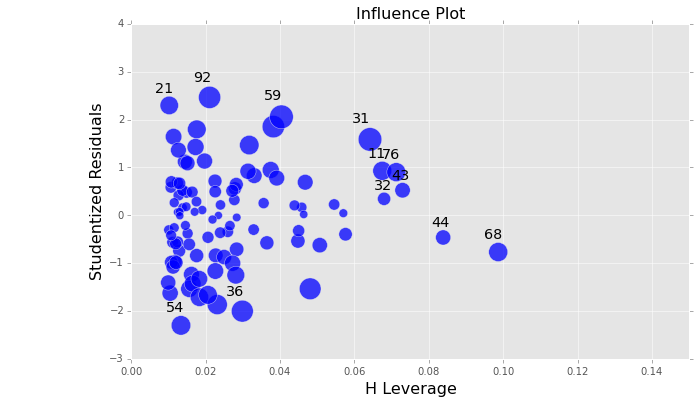

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     414.5
Date:                Sat, 16 Apr 2016   Prob (F-statistic):           3.64e-37
Time:                        18:57:21   Log-Likelihood:                -146.66
No. Observations:                 101   AIC:                             297.3
Df Residuals:                      99   BIC:                             302.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.8434      0.104     17.659      0.0

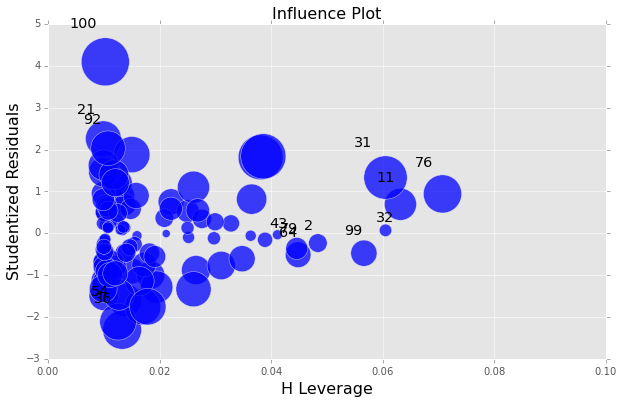

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     435.0
Date:                Sat, 16 Apr 2016   Prob (F-statistic):           5.21e-38
Time:                        18:57:22   Log-Likelihood:                -144.68
No. Observations:                 101   AIC:                             293.4
Df Residuals:                      99   BIC:                             298.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.7565      0.102     17.214      0.0

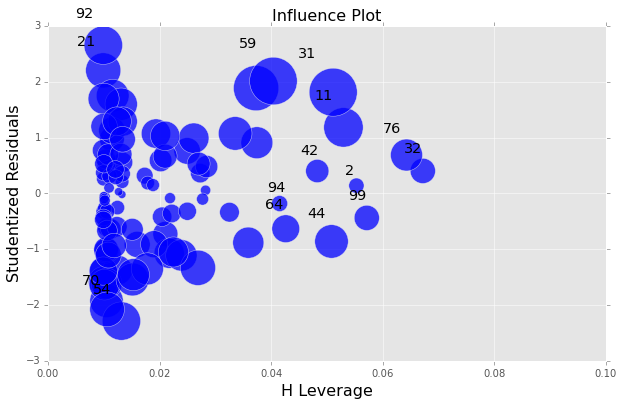

In [46]:
plt.rcParams['figure.figsize'] = (10, 6)

x_1 = np.append(x_1, 0.1)
x_2 = np.append(x_2, 0.8)
y = np.append(y, 6)

X = np.column_stack((x_1, x_2))
X = sm.add_constant(X)
corr_model = sm.OLS(y, X)
results = corr_model.fit()
print(results.summary())

plt.clf()
sm.graphics.influence_plot(results, criterion="cooks")
plt.xlim(0, .15)
plt.show()

X = sm.add_constant(x_1)
corr_model_2 = sm.OLS(y, X)
results = corr_model_2.fit()
print(results.summary())

plt.clf()
sm.graphics.influence_plot(results, criterion="cooks")
plt.xlim(0, .1)
plt.show()

X = sm.add_constant(x_2)
corr_model_3 = sm.OLS(y, X)
results = corr_model_3.fit()
print(results.summary())

plt.clf()
sm.graphics.influence_plot(results, criterion="cooks")
plt.xlim(0, .1)
plt.show()

It's an outlier in the second model (x_1 alone).

There are some high leverage points in the data, but the new point doesn't seem to be that high leverage.

**15: This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.**

**(a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.**

In [47]:
boston = pd.read_csv('C:/Users/ben/Desktop/islr/Boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [48]:
# loop through variables and fit a model;
# if the coefficient is significant at the alpha = 0.05 level, store the results as a significant variable
# otherwise store the results as a non-significant variable

significant_variables = {}
nonsignificant_variables = {}
for var in boston.columns[1:]:
    X = boston[var]
    X = sm.add_constant(X)
    y = boston['crim']
    model = sm.OLS(y, X)
    results = model.fit()
    if results.pvalues[1] < .05:
        significant_variables[var] = results.summary()
    else:
        nonsignificant_variables[var] = results.summary()

print(significant_variables.keys())
print(nonsignificant_variables.keys())

dict_keys(['lstat', 'ptratio', 'rad', 'rm', 'indus', 'zn', 'black', 'dis', 'nox', 'tax', 'age', 'medv'])
dict_keys(['chas'])


Everything is significant at the .05 level except for `chas`.

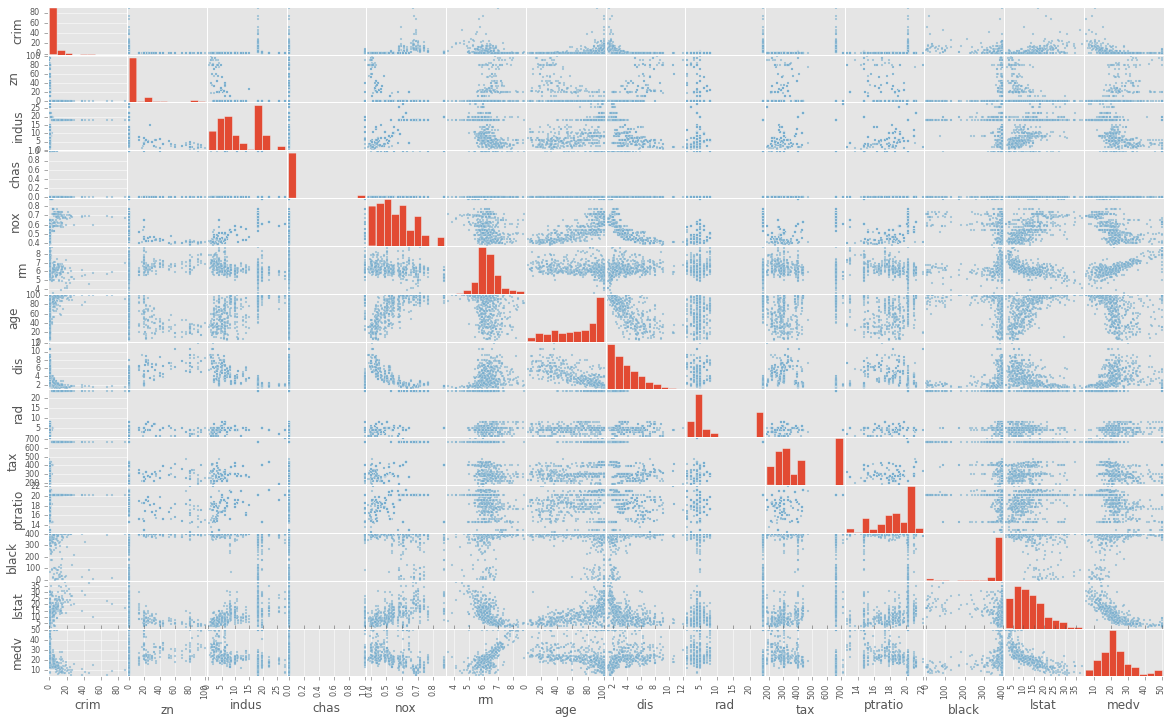

In [51]:
plt.rcParams['figure.figsize'] = (20, 12)
pd.tools.plotting.scatter_matrix(boston);

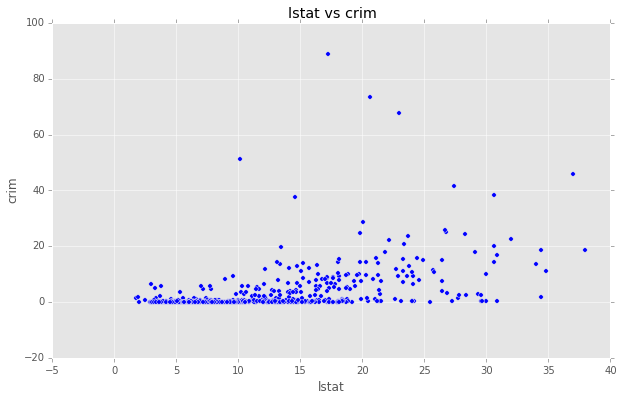

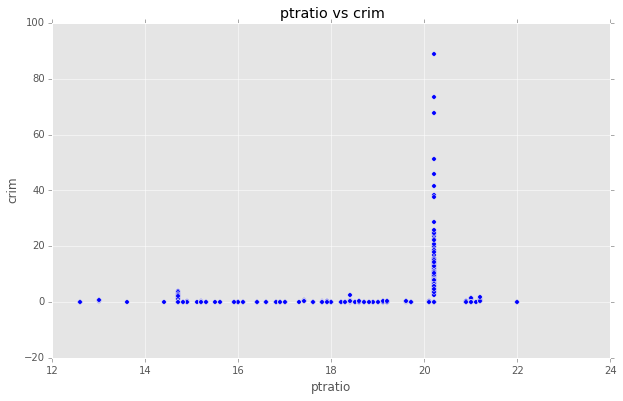

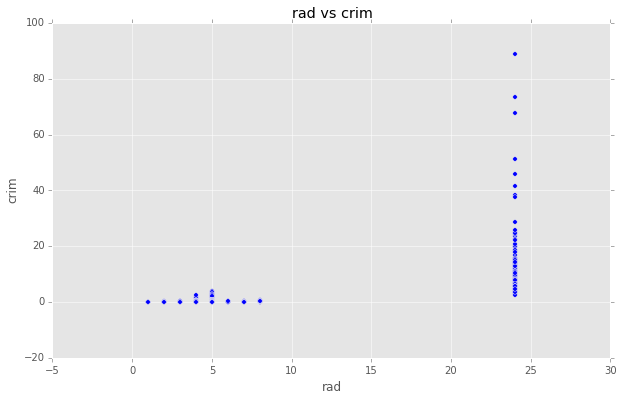

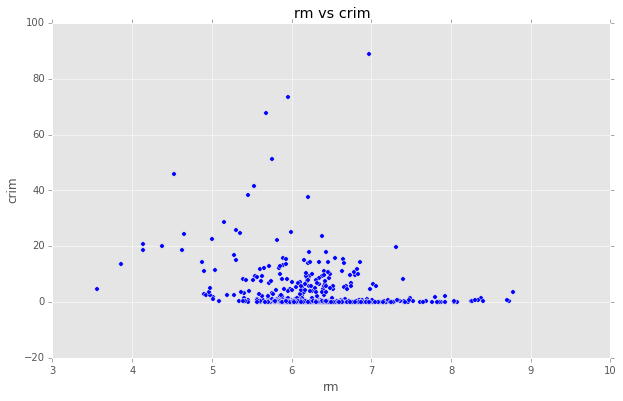

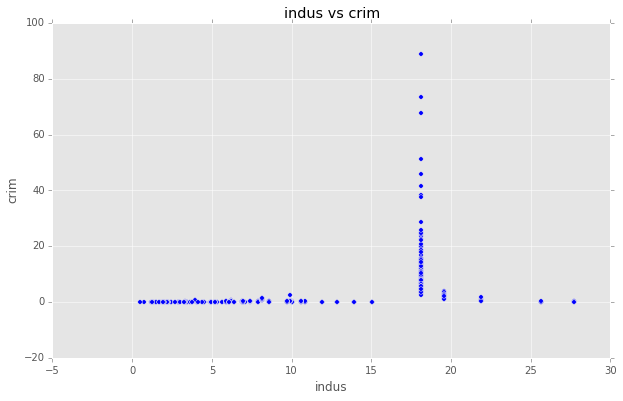

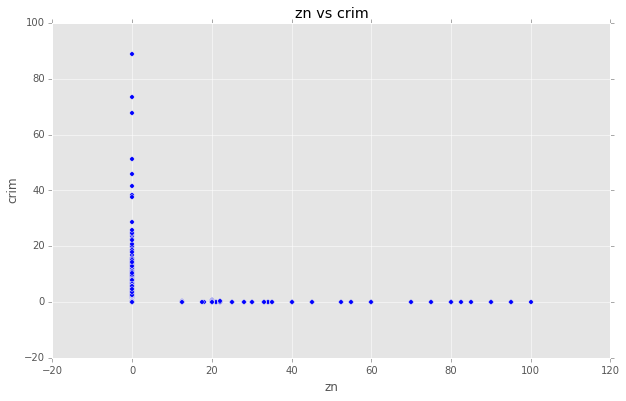

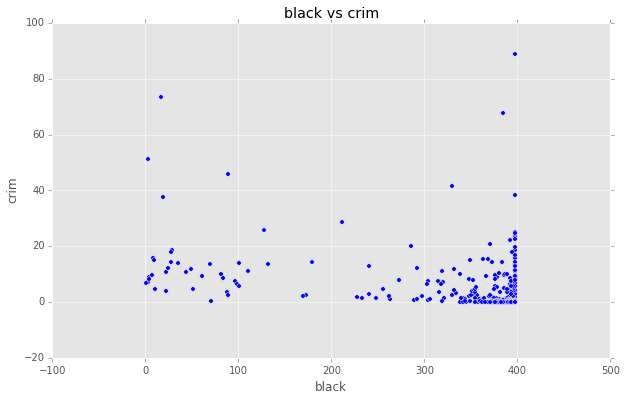

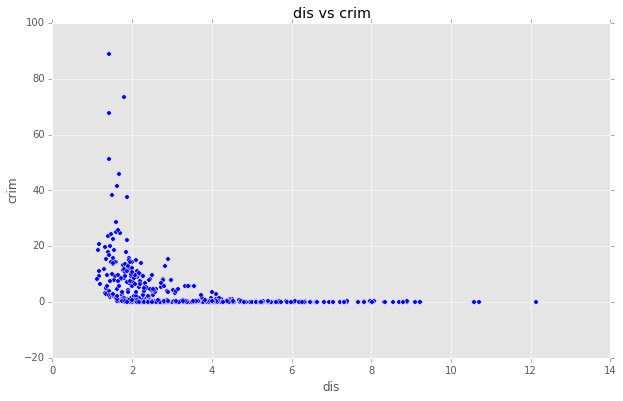

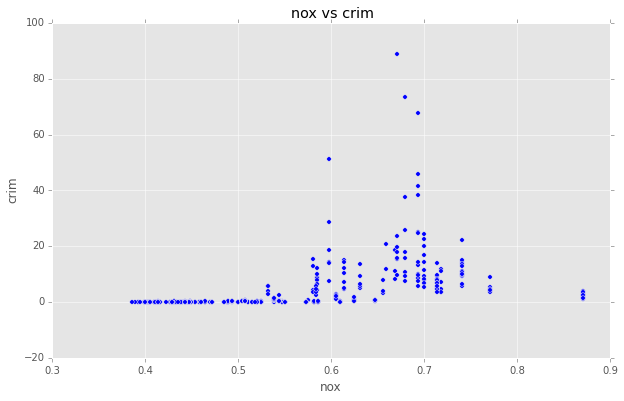

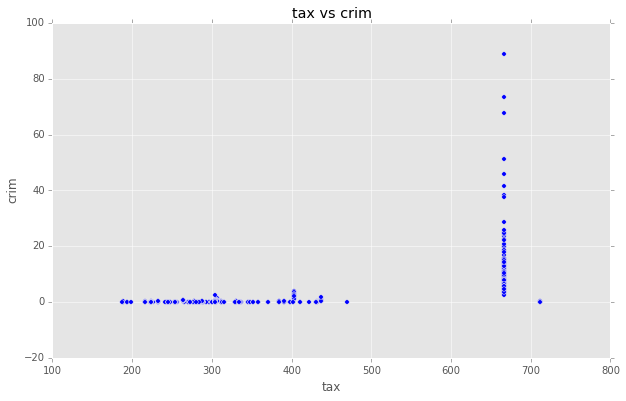

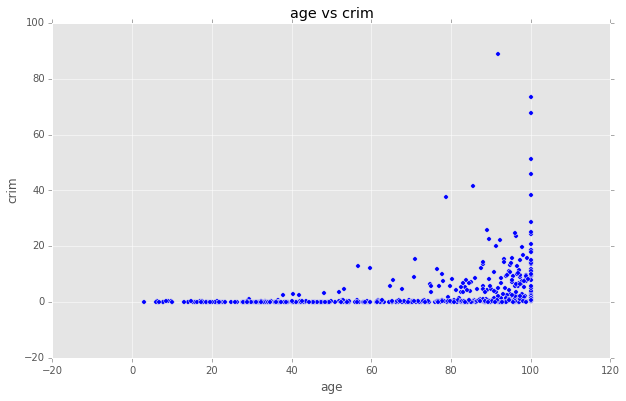

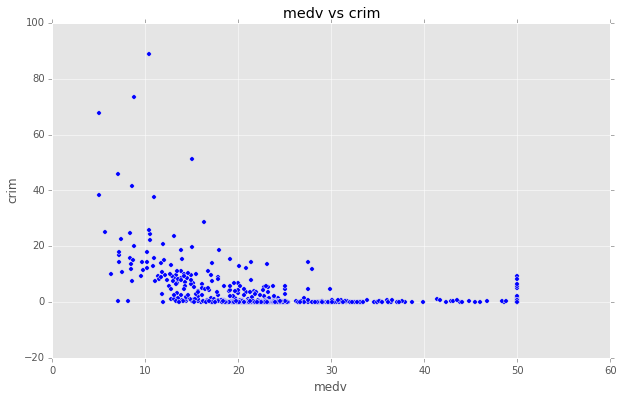

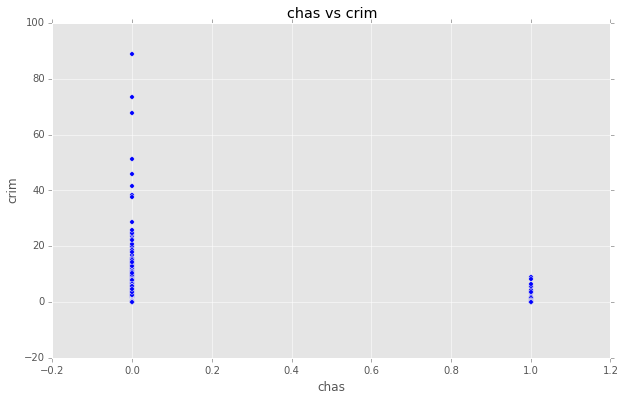

In [53]:
plt.rcParams['figure.figsize'] = (10, 6)

# first do significant variables...

for key in significant_variables:
    plt.scatter(boston[key], boston['crim'])
    plt.title('{} vs crim'.format(key))
    plt.xlabel(key)
    plt.ylabel('crim')
    plt.show()

# and then non-...

plt.scatter(boston['chas'], boston['crim'])
plt.title('chas vs crim')
plt.xlabel('chas')
plt.ylabel('crim')
plt.show()

This looks reasonable... A variable will be significant in this case if the least squares regression line is significantly different than a line with 0 slope, and that looks to be the case here.

**(b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?**

In [55]:
X = boston[[var for var in boston if var != 'crim']]
X = sm.add_constant(X)
y = boston['crim']
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

# print out significant variables (at the .05 level)
results.pvalues[results.pvalues < .05]

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Sat, 16 Apr 2016   Prob (F-statistic):           1.57e-56
Time:                        19:13:54   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         17.0332      7.235      2.354      0.0

const    1.894909e-02
zn       1.702489e-02
dis      5.022039e-04
rad      6.460451e-11
black    4.070233e-02
medv     1.086810e-03
dtype: float64

**(c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.**

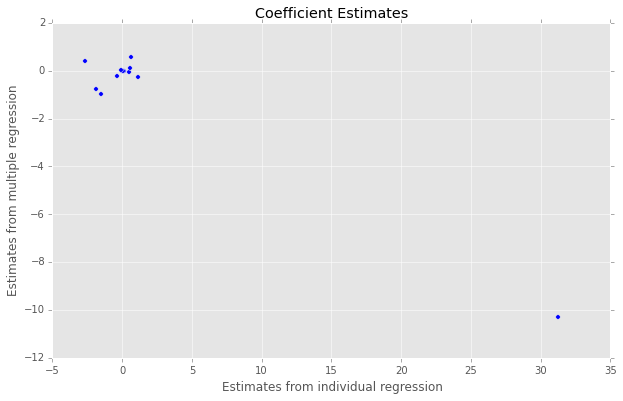

In [57]:
# loop through and do individual regressions, pulling out the estimates
# put them into a series, and then merge them with the estimates from the multiple regressions
# (series are used so that the values align)

indiv_coefs = {}
for var in boston.columns[1:]:
    X = boston[var]
    X = sm.add_constant(X)
    y = boston['crim']
    model = sm.OLS(y, X)
    results_ind = model.fit()
    indiv_coefs[var] = results_ind.params[1]
indiv_coef_series = pd.Series(indiv_coefs)
coefs = pd.concat([results.params, indiv_coef_series], axis=1).dropna()

plt.scatter(x=coefs[1], y=coefs[0])
plt.title('Coefficient Estimates')
plt.xlabel('Estimates from individual regression')
plt.ylabel('Estimates from multiple regression')
plt.show()

**(d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form**
$$Y = β_0 + β_1X + β_2X^2 + β_3X^3 + \varepsilon.$$

In [58]:
# just build the variables and loop through, printing the summary
# (lots of output)

for var in boston.columns[1:]:
    x_1 = boston[var]
    x_2 = x_1**2
    x_3 = x_1**3
    X = np.column_stack((x_1, x_2, x_3))
    X = sm.add_constant(X)
    y = boston['crim']
    model = sm.OLS(y, X)
    results = model.fit()
    print(var.upper())
    print(results.summary())

ZN
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Sat, 16 Apr 2016   Prob (F-statistic):           1.28e-06
Time:                        20:20:23   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          4.8461      0.433     11.192      